**Assignment on Classification bold text**

Do the following in the iris dataset

Read the dataset to python environment
Do the necessary pre-processing steps
Find out which classification model gives the best result (try all the classification algorithms discussed in the session)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_excel('/content/iris (1).xls')

In [8]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Basic Information**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Data shows it contains 1 catagorical data and 4 numerical datas.so encode the catagorical data by using one hot encoding

In [10]:
data.describe()     #Data shows the statistical measures

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**DATA PREPROCESSING**

Missing value imputation

In [11]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

presence of null values

In [12]:
data['SL'] =data['SL'].fillna(data['SL'].median())
data['SW'] =data['SW'].fillna(data['SW'].median())
data['PL'] =data['PL'].fillna(data['PL'].median())

In [13]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

null values are filled with mean values

FINDING OUTLIERS

Text(0.5, 1.0, 'Sepal Length (SL)')

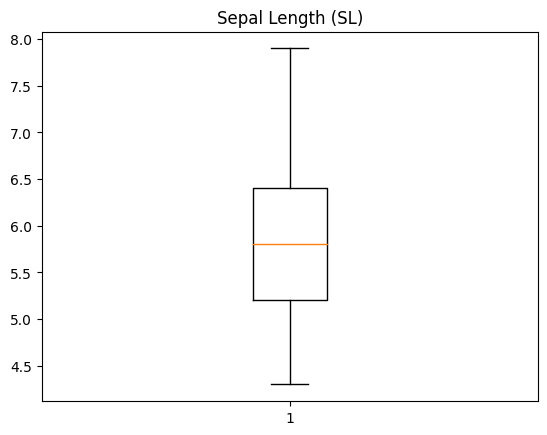

In [14]:
plt.boxplot(data['SL'])
plt.title('Sepal Length (SL)')

Text(0.5, 1.0, 'Sepal Width (SW)')

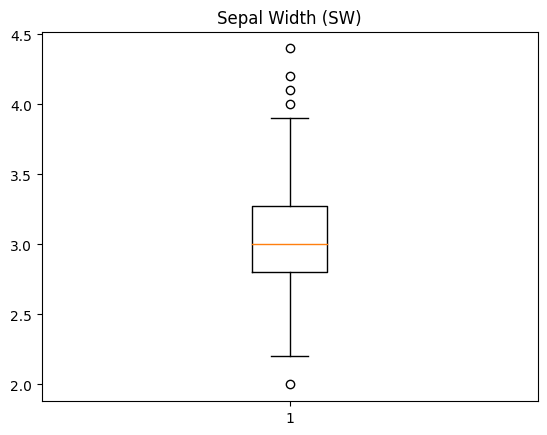

In [15]:
plt.boxplot(data['SW'])
plt.title('Sepal Width (SW)')

Text(0.5, 1.0, 'Petal Length (PL)')

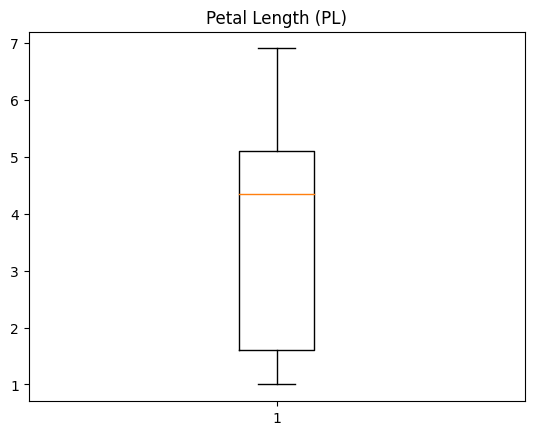

In [16]:
plt.boxplot(data['PL'])
plt.title('Petal Length (PL)')

Text(0.5, 1.0, 'Pedal Width (PW)')

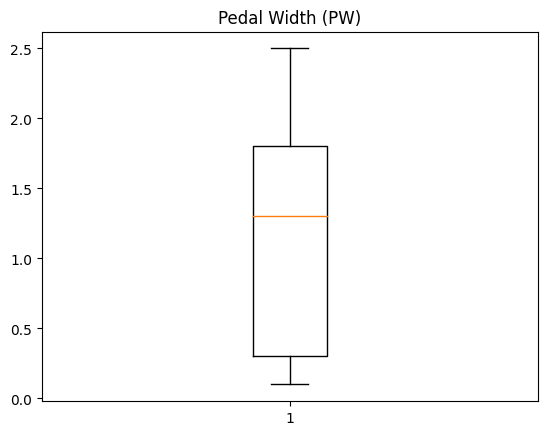

In [17]:
plt.boxplot(data['PW'])
plt.title('Pedal Width (PW)')

Boxplot shows there is an outlier in the SEPAL WIDTH.So we should remove it

In [18]:
Q1=np.percentile(data['SW'],25,method='midpoint')
Q2=np.percentile(data['SW'],50,method='midpoint')
Q3=np.percentile(data['SW'],75,method='midpoint')
print("Q1 is: ", Q1)
print("Q2 is: " ,Q2)
print("Q3 is: " ,Q3)

Q1 is:  2.8
Q2 is:  3.0
Q3 is:  3.25


In [19]:
IQR=Q3-Q1
print("IQR :",IQR)

IQR : 0.4500000000000002


In [20]:
lower_lmt = Q1 - 1.5 * IQR
upper_lmt = Q3 + 1.5 * IQR
print("lower value :",lower_lmt)
print("upper value :",upper_lmt)

lower value : 2.1249999999999996
upper value : 3.9250000000000003


In [21]:
outliers =[]

for x in data['SW']:
  if((x < lower_lmt) or (x > upper_lmt)):
    outliers.append(x)
outliers

[4.0, 4.4, 4.1, 4.2, 2.0]

In [22]:
data['SW']=data['SW'].clip(lower=lower_lmt,upper=upper_lmt)
outliers =[]

for x in data['SW']:
  if((x < lower_lmt) or (x > upper_lmt)):
    outliers.append(x)
outliers

[]

Text(0.5, 1.0, 'Sepal Width (SW)')

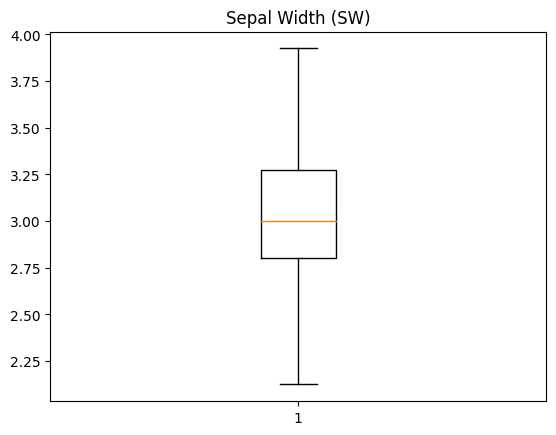

In [23]:
plt.boxplot(data['SW'])
plt.title('Sepal Width (SW)')

By using IQR method outliers are removed from SW

CORRELATION

<ipython-input-24-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

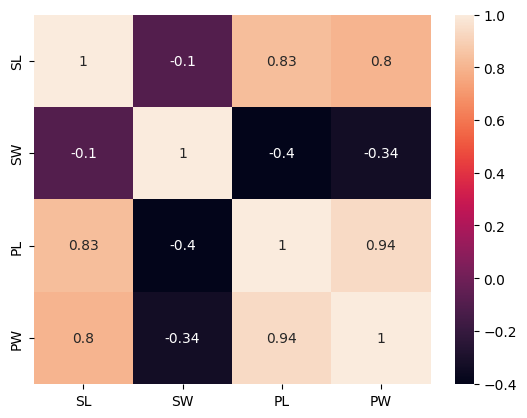

In [24]:
sns.heatmap(data.corr(),annot=True)

In [25]:
#Label Encoder to encode catagorical values

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

In [27]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
X = data.drop('Classification', axis=1)
y = data['Classification']

In [29]:
X

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


**Train-Test_split**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TYPES OF **CLASSIFIERS**

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


1.**LogisticRegression**

In [40]:
lr=LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
confusion_metric=confusion_matrix(y_test,y_pred)
print("Confusion Metric in terms of Logical Regression :",confusion_metric)
print("Accuracy in terms of Logical Regression :",accuracy)

Confusion Metric in terms of Logical Regression : [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Accuracy in terms of Logical Regression : 0.9666666666666667


2 **DecisionTreeClassifier**

In [41]:
dc=DecisionTreeClassifier()
dc.fit(X_train_scaled, y_train)
y_pred = dc.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
confusion_metric=confusion_matrix(y_test,y_pred)
print("Confusion Metric in terms of Decision Tree :",confusion_metric)
print("Accuracy in terms of Decision Tree :",accuracy)


Confusion Metric in terms of Decision Tree : [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy in terms of Decision Tree : 1.0


3 **SVC**

In [42]:
sv=SVC()
sv.fit(X_train_scaled, y_train)
y_pred = sv.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
confusion_metric=confusion_matrix(y_test,y_pred)
print("Confusion Metric in terms of SVM :",confusion_metric)
print("Accuracy in terms of SVM :",accuracy)

Confusion Metric in terms of SVM : [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Accuracy in terms of SVM : 0.9666666666666667


4 **RandomForestClassifier**

In [43]:
rf=RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred =rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
confusion_metric=confusion_matrix(y_test,y_pred)
print("Confusion Metric in terms of Random forest :",confusion_metric)
print("Accuracy in terms of RandomForestClassifier :",accuracy)

Confusion Metric in terms of Random forest : [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy in terms of RandomForestClassifier : 1.0


5 **KNeighborsClassifier**

In [39]:
kn=KNeighborsClassifier()
kn.fit(X_train_scaled, y_train)
y_pred =rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy in terms of KNeighborsClassifier :",accuracy)

Accuracy in terms of KNeighborsClassifier : 1.0


# **Thus best model is Random Forest Classifiers and Decision Tree its accuracy equals 1**